#  shoping dataset                                                                                                        
Exploring a shopping dataset sourced from a MySQL database can unveil valuable insights regarding customer preferences, product popularity, sales patterns, and geographical trends, enabling businesses to make informed decisions to enhance customer satisfaction and optimize their operations.

Purpose:-
----------------------------------------------------------------------------------------------------------
Analyze shopping dataset to improve business strategies and enhance customer experiences.

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with

connection = mysql.connector.connect(
user='root',
password='root123',
host='localhost',
database='shoping' # write here database name 
)

In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [6]:
cursor.execute('SELECT * FROM Customer_Details')
data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])


In [7]:
cursor.execute('SELECT * FROM Sample_Superstore')

In [8]:
df= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [9]:
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM Sample_Superstore ')
df= pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [10]:
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [32]:
data.head() # 2 table Customer_Details data display

,CustomerID,CustomerName,CustomerEmail
0,AA-10480,Andrew Allen,aallen@example.com
1,AG-10270,Adam Grogan,agrogan@example.com
2,BH-11710,Brosina Hoffman,bhoffman@example.com
3,CG-12520,Claire Gute,cgute@example.com
4,DV-13045,Darrin Van Huff,dvanhuff@example.com


# Data Cleaning 

In [41]:
# Handle missing values
df.dropna(inplace=True)  # Drop rows with any missing values
 

In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)


In [13]:
# Check data consistency
# convert date columns to datetime format if needed
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['ShipDate'] = pd.to_datetime(df['ShipDate'])


In [14]:
df.head(5)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52


In [15]:
# Save the cleaned data to a new file
df.to_csv('cleaned_data.csv', index=False)

In [16]:
df

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2017-109484,2017-11-06,2017-11-12,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,...,97206,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.68,1,0.70,-3.79
96,97,CA-2017-161018,2017-11-09,2017-11-11,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,10009,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.53,7,0.00,40.54
97,98,CA-2017-157833,2017-06-17,2017-06-20,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,...,94122,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.31,3,0.20,17.96
98,99,CA-2016-149223,2016-09-06,2016-09-11,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,...,55106,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.88,6,0.00,22.59


# Analysis data

In [17]:
df.shape

(100, 21)

In [18]:
df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'SubCategory', 'ProductName',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [19]:
df.groupby('Category')['Sales'].sum()

Category
Furniture          11083.79
Office Supplies     5233.98
Technology          5186.75
Name: Sales, dtype: object

In [20]:
# List of columns to drop
columns_drop = ['RowID', 'OrderID', 'PostalCode', 'Region', 'ProductID']
columns_drop

['RowID', 'OrderID', 'PostalCode', 'Region', 'ProductID']

In [21]:
# Drop the columns from the DataFrame
cleaned_data = df.drop(columns=columns_drop, inplace=True)
cleaned_data

# Filtering Data

In [22]:
# Filter rows where Sales are greater than 500
sales_above_500 = df[df['Sales'] > 1000].head(10)
sales_above_500

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
10,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.18,9,0.20,85.31
24,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.63,3,0.00,240.26
27,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43,7,0.50,-1665.05
35,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Technology,Phones,GE 30524EE4,1097.54,7,0.20,123.47
54,2016-12-11,2016-12-17,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,New York,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,5,0.00,298.69
67,2014-12-05,2014-12-10,Standard Class,BS-11590,Brendan Sweed,Corporate,United States,Gilbert,Arizona,Office Supplies,Art,Hunt BOSTON Model 1606 High-Volume Electric Pe...,1113.02,8,0.20,111.30


In [23]:
# Filter rows where Category is 'Office Supplies' and SubCategory is 'Binders'
office_supplies_binders = df.query("Category == 'Office Supplies' and SubCategory == 'Binders'")
office_supplies_binders


,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
8,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,0.20,5.78
13,2016-12-05,2016-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3,0.20,132.59
15,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.54,3,0.80,-3.82
20,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,California,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.72,4,0.20,7.38
25,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,California,Office Supplies,Binders,Wilson Jones Active Use Binders,11.65,2,0.20,4.22
28,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.62,2,0.70,-7.05
32,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.86,6,0.70,-5.72
45,2016-03-11,2016-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.46,2,0.00,8.21
49,2015-04-18,2015-04-22,Standard Class,DP-13000,Darren Powers,Consumer,United States,New Albany,Indiana,Office Supplies,Binders,"C-Line Peel & Stick Add-On Filing Pockets, 8-3...",38.22,6,0.00,17.96
60,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,New York,Office Supplies,Binders,Plastic Binding Combs,48.48,4,0.20,16.36


In [24]:
# Filter rows where Profit is negative
negative_profit = df[df['Profit'] < 0]
negative_profit

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
3,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03
14,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.81,5,0.80,-123.86
15,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.54,3,0.80,-3.82
23,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.37,2,0.30,-1.02
27,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43,7,0.50,-1665.05
28,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.62,2,0.70,-7.05
32,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",6.86,6,0.70,-5.72
36,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.92,5,0.60,-147.96
38,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",532.40,3,0.32,-46.98
39,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,Texas,Furniture,Chairs,"Global Fabric Manager's Chair, Dark Gray",212.06,3,0.30,-15.15


In [25]:
# Filter rows where OrderDate is in 2017
orders_2017 = df[df['OrderDate'].dt.year == 2017]
orders_2017

,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
12,2017-04-15,2017-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,Office Supplies,Paper,Xerox 1967,15.55,3,0.20,5.44
23,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.37,2,0.30,-1.02
34,2017-10-19,2017-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,Office Supplies,Paper,Easy-staple paper,29.47,3,0.20,9.95
41,2017-09-10,2017-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,Technology,Phones,Panasonic Kx-TS550,147.17,4,0.20,16.56
43,2017-09-19,2017-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.62,2,0.20,9.56
71,2017-09-14,2017-09-17,Second Class,TB-21520,Tracy Blumstein,Consumer,United States,Jackson,Michigan,Office Supplies,Paper,Telephone Message Books with Fax/Mobile Sectio...,19.05,3,0.00,8.76
75,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,Texas,Office Supplies,Binders,Economy Binders,1.25,3,0.80,-1.93
76,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,Texas,Furniture,Furnishings,"6"""" Cubicle Wall Clock, Black",9.71,3,0.60,-5.82
77,2017-12-09,2017-12-11,First Class,KB-16600,Ken Brennan,Corporate,United States,Houston,Texas,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",27.24,3,0.20,2.72
84,2017-11-13,2017-11-16,First Class,CS-12400,Christopher Schild,Home Office,United States,Chicago,Illinois,Office Supplies,Storage,Safco Industrial Wire Shelving,230.38,3,0.20,-48.95


In [26]:
# Display summary statistics
df.describe()

,Quantity
count,100.00000
mean,3.74000
std,2.05785
min,1.00000
25%,2.00000
50%,3.00000
75%,5.00000
max,9.00000


# Data visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_11536\1038245772.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


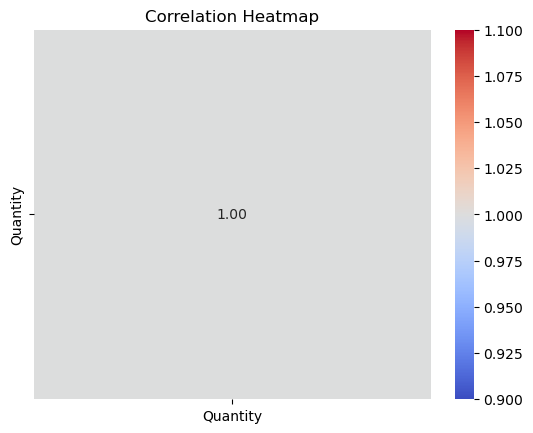

In [27]:
# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

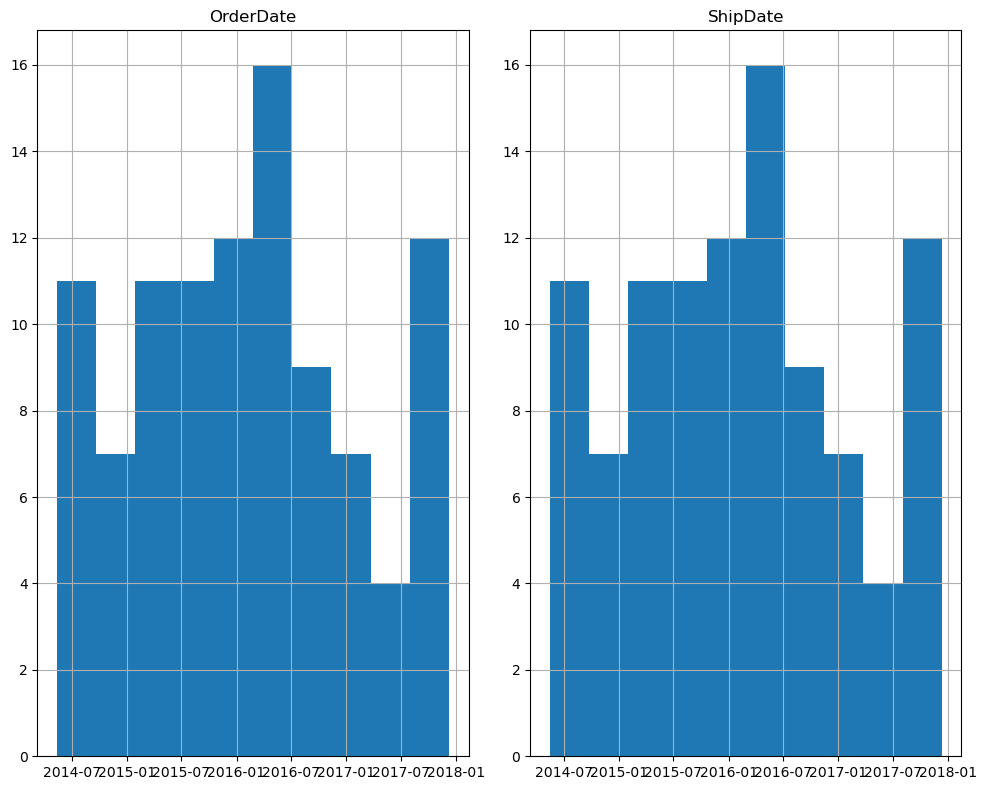

In [40]:
# Display histograms for the first 4 columns


df.iloc[:, :4].hist(figsize=(10, 8))

# Display the first 4 rows of the DataFrame
plt.tight_layout()
df.head(4)

# Show the plots
plt.show()


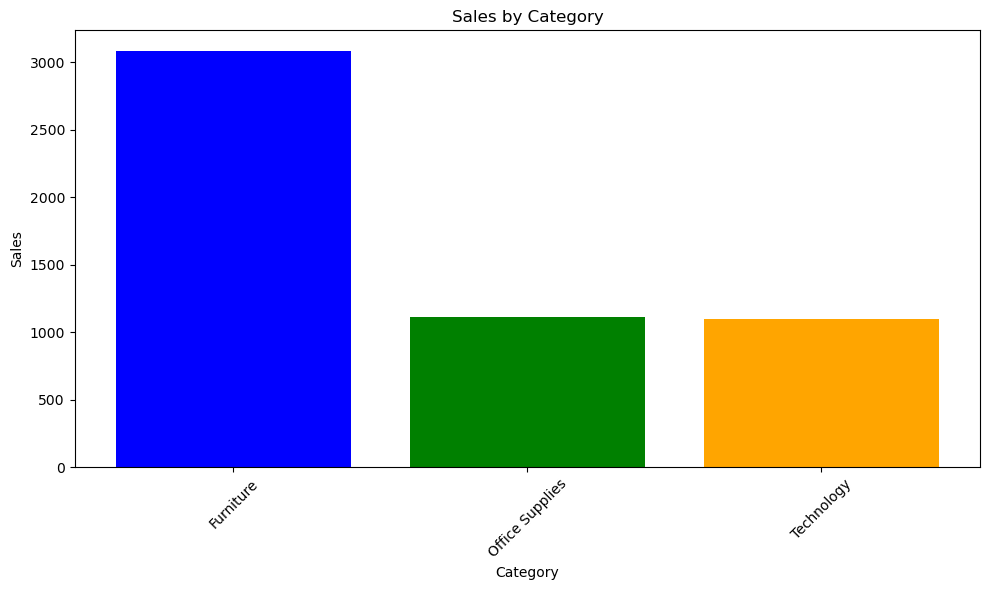

In [29]:
    colors = {'Furniture': 'blue', 'Office Supplies': 'green', 'Technology': 'orange'}
    # Plotting a bar graph for sales by category with custom colors
    plt.figure(figsize=(10, 6))
    plt.bar(df['Category'], df['Sales'], color=[colors[c] for c in df['Category']])
    plt.xlabel('Category')
    plt.ylabel('Sales')
    plt.title('Sales by Category')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

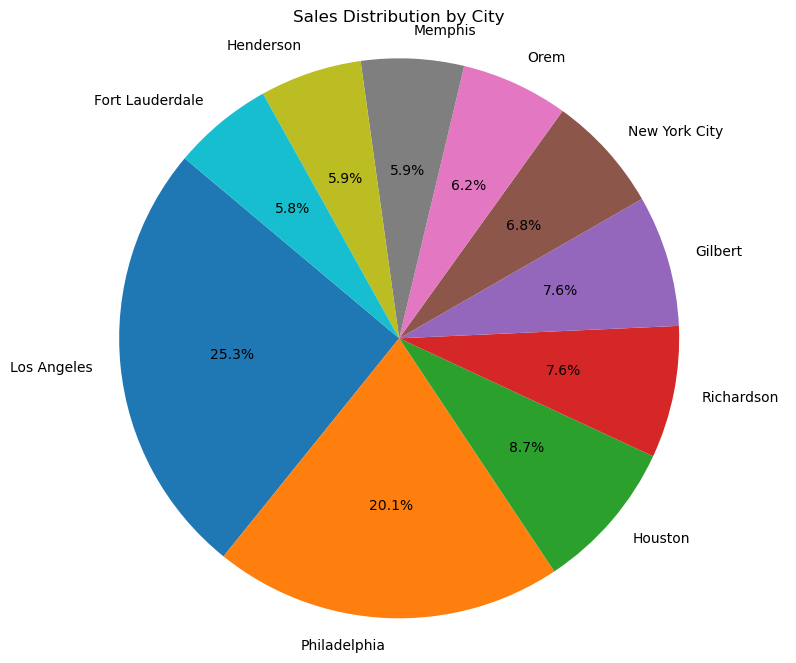

In [30]:
# Grouping the data by City and summing up the Sales for each city
sales_by_city = df.groupby('City')['Sales'].sum().reset_index()

# Sorting the data by Sales in descending order
sales_by_city = sales_by_city.sort_values(by='Sales', ascending=False).head(10)

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sales_by_city['Sales'], labels=sales_by_city['City'], autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by City')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


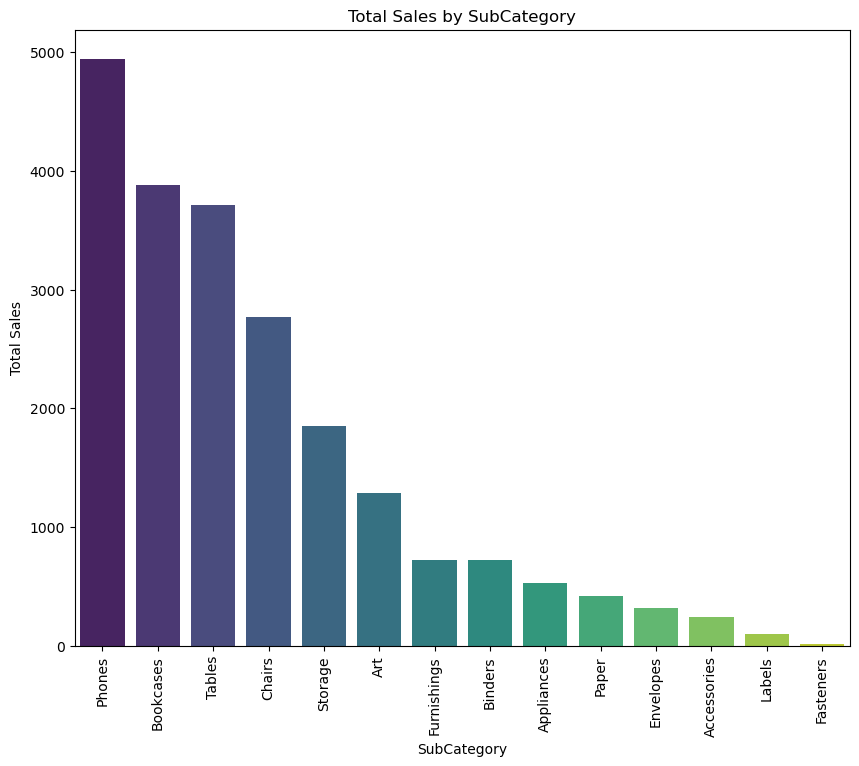

In [38]:
sales_by_subcategory = df.groupby('SubCategory')['Sales'].sum().reset_index()
sales_by_subcategory = sales_by_subcategory.sort_values(by='Sales', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='SubCategory', y='Sales', data=sales_by_subcategory, palette='viridis')
plt.title('Total Sales by SubCategory')
plt.xlabel('SubCategory')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


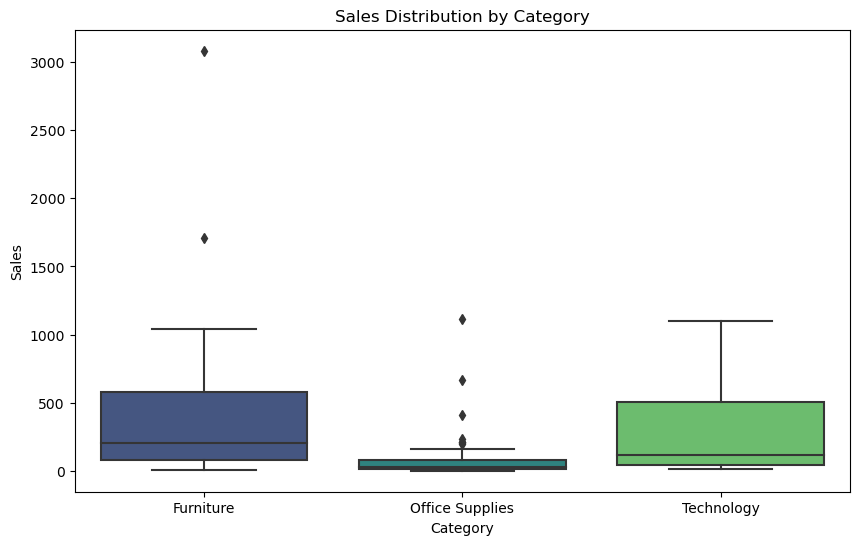

In [36]:
# Convert 'Sales' column to numerical type
df['Sales'] = pd.to_numeric(df['Sales'])

# Plotting the boxplot with 'Sales' instead of 'Profit'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=df, palette='viridis')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11536\1794219975.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


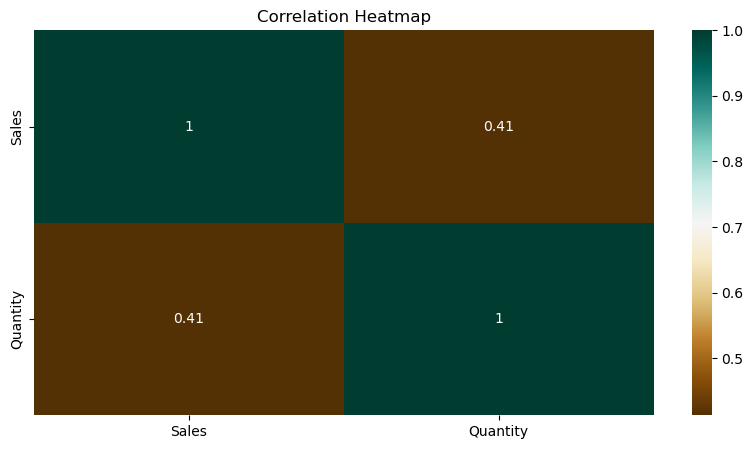

In [37]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap="BrBG", annot=True)
plt.title('Correlation Heatmap')
plt.show()

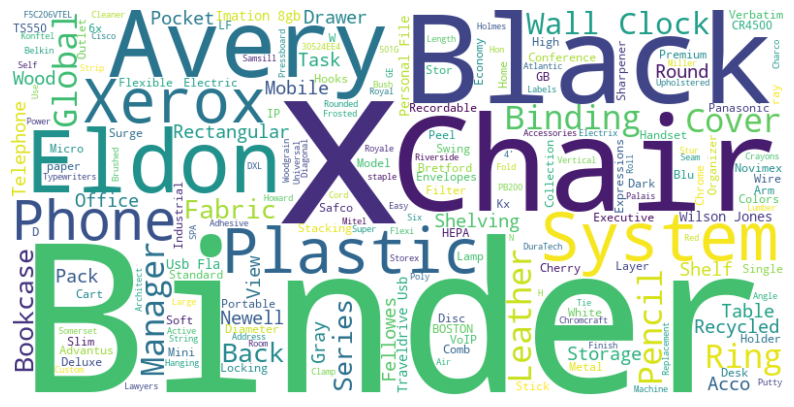

In [35]:
from wordcloud import WordCloud

# Extract text data from a specific column (e.g., 'ProductName')
text_data_column = df['ProductName'].str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_column)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# conclusion:-
    
Analyzing shopping data helps understand customer preferences, product performance, and profitability. It guides decisions on marketing, inventory, and customer engagement, leading to better business outcomes.
